In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle

import imblearn
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.model_selection import StratifiedKFold

import time 

start_time = time.time()


Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

from sklearn.utils import shuffle
df= shuffle(df)

In [3]:
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
#Separation of data into training & test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 18s 71us/step - loss: 0.0012 - val_loss: 2.8487e-04
Epoch 2/150
256326/256326 [==============================] - 18s 71us/step - loss: 1.9309e-04 - val_loss: 2.1527e-04
Epoch 3/150
256326/256326 [==============================] - 19s 73us/step - loss: 1.3636e-04 - val_loss: 1.2769e-04
Epoch 4/150
256326/256326 [==============================] - 19s 73us/step - loss: 1.2180e-04 - val_loss: 1.2439e-04
Epoch 5/150
256326/256326 [==============================] - 19s 73us/step - loss: 1.1257e-04 - val_loss: 1.0689e-04
Epoch 6/150
256326/256326 [==============================] - 19s 73us/step - loss: 1.0435e-04 - val_loss: 1.2593e-04
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 19s 75us/step - loss: 3.3454e-05 - val_loss: 3.4301e-05
Epoch 69/150
256326/256326 [==============================] - 19s 74us/step - loss: 3.3015e-05 - val_loss: 3.5946e-05
Epoch 70/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.2830e-05 - val_loss: 4.3280e-05
Epoch 71/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.3118e-05 - val_loss: 3.1765e-05
Epoch 72/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.2785e-05 - val_loss: 3.3117e-05
Epoch 73/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.2551e-05 - val_loss: 3.1139e-05
Epoch 74/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.2438e-05 - val_loss: 4.5362e-05
Epoch 75/150
256326/256326 [==============================] - 19s 72us/step - loss: 3.2389e-05 - val_loss: 7.0230e-05
Epoch 76/150
256326/256326 [==============================] - 19s 76u

256326/256326 [==============================] - 19s 73us/step - loss: 2.9161e-05 - val_loss: 3.0593e-05
Epoch 138/150
256326/256326 [==============================] - 19s 73us/step - loss: 2.9150e-05 - val_loss: 2.7337e-05
Epoch 139/150
256326/256326 [==============================] - 19s 73us/step - loss: 2.9339e-05 - val_loss: 2.5632e-05
Epoch 140/150
256326/256326 [==============================] - 19s 72us/step - loss: 2.9088e-05 - val_loss: 2.7610e-05
Epoch 141/150
256326/256326 [==============================] - 19s 73us/step - loss: 2.9021e-05 - val_loss: 2.5870e-05
Epoch 142/150
256326/256326 [==============================] - 19s 72us/step - loss: 2.9135e-05 - val_loss: 2.6854e-05
Epoch 143/150
256326/256326 [==============================] - 19s 72us/step - loss: 2.9153e-05 - val_loss: 3.3736e-05
Epoch 144/150
256326/256326 [==============================] - 19s 73us/step - loss: 2.8922e-05 - val_loss: 2.6769e-05
Epoch 145/150
256326/256326 [==============================] -

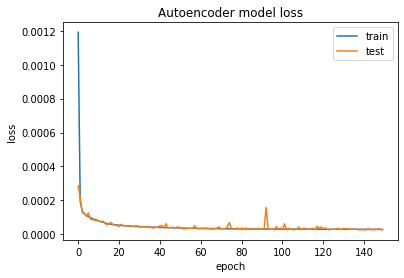

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 44s 172us/step - loss: 0.0237 - accuracy: 0.9938 - val_loss: 0.0049 - val_accuracy: 0.9990
Epoch 2/50
256326/256326 [==============================] - 43s 169us/step - loss: 0.0074 - accuracy: 0.9988 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 3/50
256326/256326 [==============================] - 43s 169us/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 4/50
256326/256326 [==============================] - 43s 168us/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 5/50
256326/256326 [==============================] - 43s 169us/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 6/50
256326/256326 [==============================] - 43s 168us/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 7/50
256326/256326 [=================

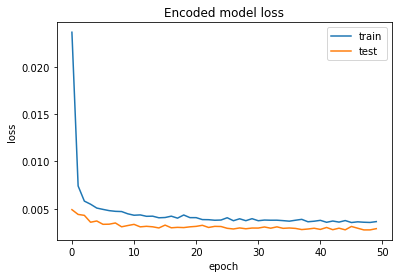

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9992275552122467


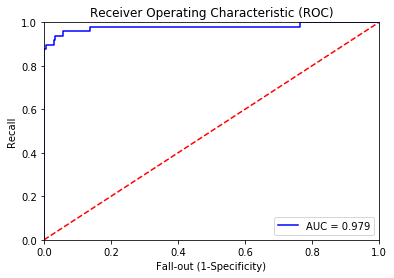

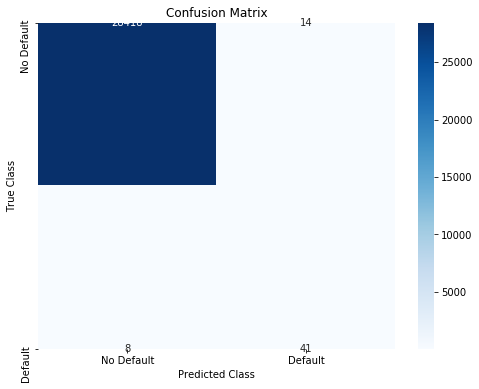

AUC(ROC): 0.9181211454756354
Precision: 0.7454545454545455
Recall: 0.8367346938775511
F1 score: 0.7884615384615385
False positives: 14
True positives: 41
False negatives: 8
True negatives: 28418
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 19s 74us/step - loss: 0.0013 - val_loss: 2.3312e-04
Epoch 2/150
256326/256326 [==============================] - 19s 72us/step - loss: 1.8002e-04 - val_loss: 1.4990e-04
Epoch 3/150
256326/256326 [==============================] - 19s 72us/step - loss: 1.3248e-04 - val_loss: 1.2770e-04
Epoch 4/150
256326/256326 [==============================] - 19s 72us/step - loss: 1.1832e-04 - val_loss: 1.3639e-04
Epoch 5/150
256326/256326 [==============================] - 19s 72us/step - loss: 1.0887e-04 - val_loss: 1.1937e-04
Epoch 6/150
256326/256326 [==============================] - 19s 72us/step - loss: 9.9298e-05 - val_loss: 9.8734e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 19s 74us/step - loss: 3.6686e-05 - val_loss: 4.0514e-05
Epoch 69/150
256326/256326 [==============================] - 19s 72us/step - loss: 3.6540e-05 - val_loss: 4.5309e-05
Epoch 70/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.6353e-05 - val_loss: 3.8163e-05
Epoch 71/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.6265e-05 - val_loss: 3.2726e-05
Epoch 72/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.6259e-05 - val_loss: 3.5990e-05
Epoch 73/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.6096e-05 - val_loss: 3.7846e-05
Epoch 74/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.5758e-05 - val_loss: 3.5975e-05
Epoch 75/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.5768e-05 - val_loss: 3.2748e-05
Epoch 76/150
256326/256326 [==============================] - 18s 72u

256326/256326 [==============================] - 20s 79us/step - loss: 3.3373e-05 - val_loss: 3.1668e-05
Epoch 138/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.3304e-05 - val_loss: 2.8990e-05
Epoch 139/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.3265e-05 - val_loss: 3.4279e-05
Epoch 140/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.3221e-05 - val_loss: 3.1253e-05
Epoch 141/150
256326/256326 [==============================] - 20s 76us/step - loss: 3.3438e-05 - val_loss: 3.8086e-05
Epoch 142/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.3179e-05 - val_loss: 4.0271e-05
Epoch 143/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.3113e-05 - val_loss: 2.9761e-05
Epoch 144/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.3535e-05 - val_loss: 3.1278e-05
Epoch 145/150
256326/256326 [==============================] -

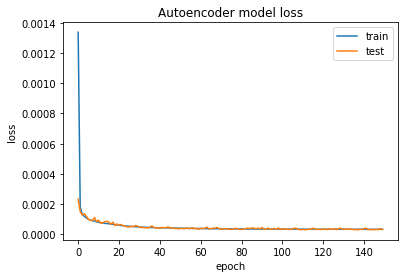

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 52s 204us/step - loss: 0.0411 - accuracy: 0.9869 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 2/50
256326/256326 [==============================] - 52s 201us/step - loss: 0.0074 - accuracy: 0.9989 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 3/50
256326/256326 [==============================] - 51s 200us/step - loss: 0.0057 - accuracy: 0.9990 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 4/50
256326/256326 [==============================] - 52s 203us/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 5/50
256326/256326 [==============================] - 52s 204us/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 6/50
256326/256326 [==============================] - 48s 186us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 7/50
256326/256326 [=================

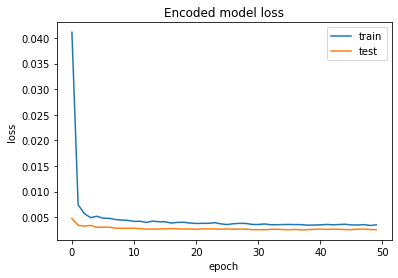

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994382219725431


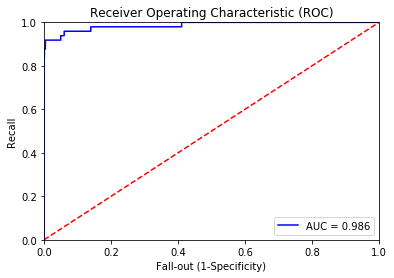

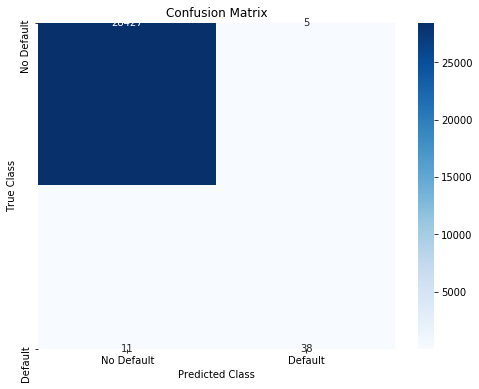

AUC(ROC): 0.8876671729468377
Precision: 0.8837209302325582
Recall: 0.7755102040816326
F1 score: 0.826086956521739
False positives: 5
True positives: 38
False negatives: 11
True negatives: 28427
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 22s 87us/step - loss: 0.0016 - val_loss: 2.9151e-04
Epoch 2/150
256326/256326 [==============================] - 22s 84us/step - loss: 2.0666e-04 - val_loss: 1.5655e-04
Epoch 3/150
256326/256326 [==============================] - 21s 84us/step - loss: 1.3037e-04 - val_loss: 1.1962e-04
Epoch 4/150
256326/256326 [==============================] - 22s 84us/step - loss: 1.1651e-04 - val_loss: 1.1578e-04
Epoch 5/150
256326/256326 [==============================] - 21s 84us/step - loss: 1.0940e-04 - val_loss: 1.1353e-04
Epoch 6/150
256326/256326 [==============================] - 22s 84us/step - loss: 1.0188e-04 - val_loss: 1.0285e-04
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 21s 84us/step - loss: 3.7985e-05 - val_loss: 4.5788e-05
Epoch 69/150
256326/256326 [==============================] - 21s 83us/step - loss: 3.8055e-05 - val_loss: 4.7470e-05
Epoch 70/150
256326/256326 [==============================] - 22s 84us/step - loss: 3.7538e-05 - val_loss: 3.8492e-05
Epoch 71/150
256326/256326 [==============================] - 21s 84us/step - loss: 3.7838e-05 - val_loss: 5.3337e-05
Epoch 72/150
256326/256326 [==============================] - 22s 84us/step - loss: 3.7725e-05 - val_loss: 3.7206e-05
Epoch 73/150
256326/256326 [==============================] - 21s 83us/step - loss: 3.7130e-05 - val_loss: 3.4481e-05
Epoch 74/150
256326/256326 [==============================] - 21s 83us/step - loss: 3.7465e-05 - val_loss: 3.4919e-05
Epoch 75/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.7377e-05 - val_loss: 3.6565e-05
Epoch 76/150
256326/256326 [==============================] - 20s 78u

256326/256326 [==============================] - 20s 80us/step - loss: 3.3154e-05 - val_loss: 3.1926e-05
Epoch 138/150
256326/256326 [==============================] - 21s 80us/step - loss: 3.2971e-05 - val_loss: 3.6963e-05
Epoch 139/150
256326/256326 [==============================] - 21s 81us/step - loss: 3.2461e-05 - val_loss: 3.6093e-05
Epoch 140/150
256326/256326 [==============================] - 21s 81us/step - loss: 3.3048e-05 - val_loss: 3.2739e-05
Epoch 141/150
256326/256326 [==============================] - 21s 81us/step - loss: 3.2725e-05 - val_loss: 5.1496e-05
Epoch 142/150
256326/256326 [==============================] - 21s 81us/step - loss: 3.2740e-05 - val_loss: 3.0938e-05
Epoch 143/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.2295e-05 - val_loss: 3.0836e-05
Epoch 144/150
256326/256326 [==============================] - 20s 77us/step - loss: 3.2609e-05 - val_loss: 3.2676e-05
Epoch 145/150
256326/256326 [==============================] -

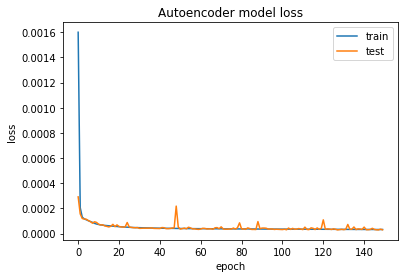

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 50s 196us/step - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.0071 - val_accuracy: 0.9991
Epoch 2/50
256326/256326 [==============================] - 49s 190us/step - loss: 0.0071 - accuracy: 0.9988 - val_loss: 0.0065 - val_accuracy: 0.9992
Epoch 3/50
256326/256326 [==============================] - 48s 189us/step - loss: 0.0056 - accuracy: 0.9989 - val_loss: 0.0067 - val_accuracy: 0.9992
Epoch 4/50
256326/256326 [==============================] - 48s 189us/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.0066 - val_accuracy: 0.9991
Epoch 5/50
256326/256326 [==============================] - 48s 189us/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.0064 - val_accuracy: 0.9992
Epoch 6/50
256326/256326 [==============================] - 49s 190us/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0065 - val_accuracy: 0.9992
Epoch 7/50
256326/256326 [=================

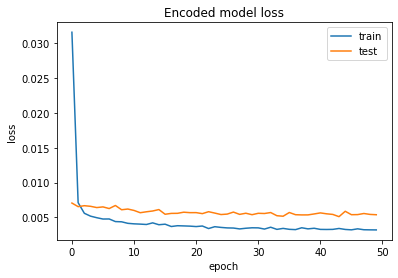

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9992626663389628


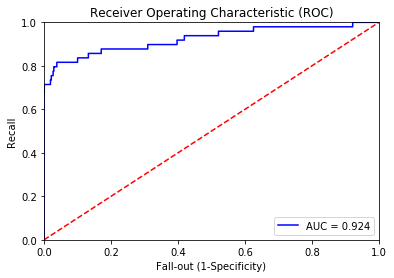

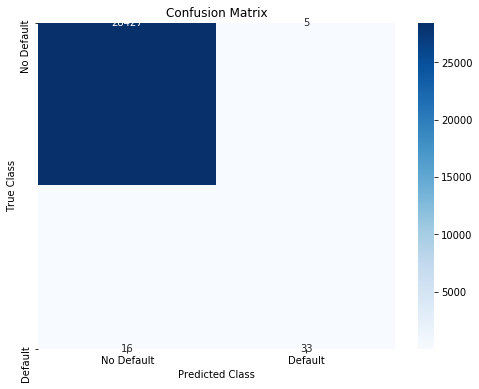

AUC(ROC): 0.8366467647835726
Precision: 0.868421052631579
Recall: 0.673469387755102
F1 score: 0.7586206896551724
False positives: 5
True positives: 33
False negatives: 16
True negatives: 28427
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 25s 97us/step - loss: 0.0011 - val_loss: 2.7314e-04
Epoch 2/150
256326/256326 [==============================] - 24s 92us/step - loss: 1.8464e-04 - val_loss: 1.5407e-04
Epoch 3/150
256326/256326 [==============================] - 24s 93us/step - loss: 1.2740e-04 - val_loss: 1.3269e-04
Epoch 4/150
256326/256326 [==============================] - 24s 92us/step - loss: 1.2113e-04 - val_loss: 1.2948e-04
Epoch 5/150
256326/256326 [==============================] - 24s 92us/step - loss: 1.1594e-04 - val_loss: 1.1734e-04
Epoch 6/150
256326/256326 [==============================] - 24s 93us/step - loss: 1.0322e-04 - val_loss: 9.6949e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 23s 88us/step - loss: 3.8784e-05 - val_loss: 3.7088e-05
Epoch 69/150
256326/256326 [==============================] - 23s 89us/step - loss: 3.8548e-05 - val_loss: 4.0602e-05
Epoch 70/150
256326/256326 [==============================] - 23s 90us/step - loss: 3.8711e-05 - val_loss: 3.8273e-05
Epoch 71/150
256326/256326 [==============================] - 24s 93us/step - loss: 3.8331e-05 - val_loss: 4.0127e-05
Epoch 72/150
256326/256326 [==============================] - 23s 91us/step - loss: 3.7973e-05 - val_loss: 4.0246e-05
Epoch 73/150
256326/256326 [==============================] - 22s 84us/step - loss: 3.8100e-05 - val_loss: 4.3596e-05
Epoch 74/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.7689e-05 - val_loss: 3.8476e-05
Epoch 75/150
256326/256326 [==============================] - 22s 85us/step - loss: 3.7665e-05 - val_loss: 3.6162e-05
Epoch 76/150
256326/256326 [==============================] - 22s 85u

256326/256326 [==============================] - 23s 91us/step - loss: 3.1055e-05 - val_loss: 3.0624e-05
Epoch 138/150
256326/256326 [==============================] - 23s 88us/step - loss: 3.0962e-05 - val_loss: 3.2971e-05
Epoch 139/150
256326/256326 [==============================] - 21s 84us/step - loss: 3.1110e-05 - val_loss: 3.0864e-05
Epoch 140/150
256326/256326 [==============================] - 24s 92us/step - loss: 3.0658e-05 - val_loss: 5.9917e-05
Epoch 141/150
256326/256326 [==============================] - 22s 87us/step - loss: 3.0763e-05 - val_loss: 3.0701e-05
Epoch 142/150
256326/256326 [==============================] - 22s 85us/step - loss: 3.0631e-05 - val_loss: 2.9656e-05
Epoch 143/150
256326/256326 [==============================] - 22s 87us/step - loss: 3.0745e-05 - val_loss: 3.6893e-05
Epoch 144/150
256326/256326 [==============================] - 22s 84us/step - loss: 3.0802e-05 - val_loss: 3.1289e-05
Epoch 145/150
256326/256326 [==============================] -

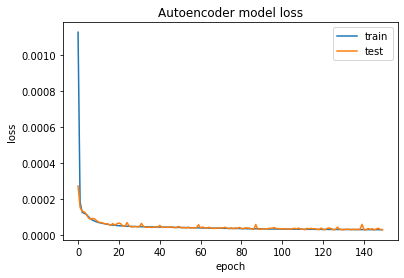

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 54s 209us/step - loss: 0.0206 - accuracy: 0.9960 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 2/50
256326/256326 [==============================] - 55s 214us/step - loss: 0.0069 - accuracy: 0.9989 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 3/50
256326/256326 [==============================] - 56s 218us/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 5/50
256326/256326 [==============================] - 59s 230us/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9996
Epoch 28/50
256326/256326 [==============================] - 59s 232us/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9996
Epoch 44/50
 80704/256326 [========>.....................] - ETA: 37s - loss: 0.0035 - accuracy: 0.9993

F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 25s 98us/step - loss: 0.0013 - val_loss: 2.4802e-04
Epoch 2/150
256326/256326 [==============================] - 25s 96us/step - loss: 1.9368e-04 - val_loss: 1.9200e-04
Epoch 3/150
256326/256326 [==============================] - 23s 89us/step - loss: 1.3554e-04 - val_loss: 1.2963e-04
Epoch 4/150
256326/256326 [==============================] - 21s 83us/step - loss: 1.2171e-04 - val_loss: 1.2721e-04
Epoch 5/150
256326/256326 [==============================] - 21s 81us/step - loss: 1.1544e-04 - val_loss: 1.1356e-04
Epoch 6/150
256326/256326 [==============================] - 21s 81us/step - loss: 1.0553e-04 - val_loss: 1.1597e-04
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 22s 87us/step - loss: 3.5062e-05 - val_loss: 3.8868e-05
Epoch 69/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.4943e-05 - val_loss: 4.2404e-05
Epoch 70/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.4907e-05 - val_loss: 4.2722e-05
Epoch 71/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.4866e-05 - val_loss: 4.1555e-05
Epoch 72/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.4683e-05 - val_loss: 3.9227e-05
Epoch 73/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.4614e-05 - val_loss: 4.3006e-05
Epoch 74/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.4403e-05 - val_loss: 3.9775e-05
Epoch 75/150
256326/256326 [==============================] - 21s 83us/step - loss: 3.4625e-05 - val_loss: 3.7654e-05
Epoch 76/150
256326/256326 [==============================] - 21s 83u

256326/256326 [==============================] - 20s 78us/step - loss: 3.1381e-05 - val_loss: 3.6287e-05
Epoch 138/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.1522e-05 - val_loss: 4.5496e-05
Epoch 139/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.1338e-05 - val_loss: 4.4553e-05
Epoch 140/150
256326/256326 [==============================] - 21s 81us/step - loss: 3.1390e-05 - val_loss: 4.8961e-05
Epoch 141/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.1385e-05 - val_loss: 3.3217e-05
Epoch 142/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.1355e-05 - val_loss: 3.8044e-05
Epoch 143/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.1267e-05 - val_loss: 3.8930e-05
Epoch 144/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.1532e-05 - val_loss: 3.9782e-05
Epoch 145/150
256326/256326 [==============================] -

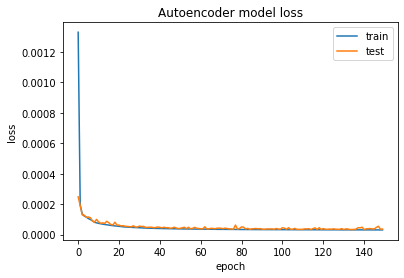

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 52s 204us/step - loss: 0.0387 - accuracy: 0.9891 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 2/50
256326/256326 [==============================] - 51s 199us/step - loss: 0.0083 - accuracy: 0.9986 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 3/50
256326/256326 [==============================] - 51s 200us/step - loss: 0.0069 - accuracy: 0.9989 - val_loss: 0.0024 - val_accuracy: 0.9994
Epoch 4/50
256326/256326 [==============================] - 50s 195us/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0023 - val_accuracy: 0.9995
Epoch 5/50
256326/256326 [==============================] - 49s 191us/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 6/50
256326/256326 [==============================] - 49s 191us/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 7/50
256326/256326 [=================

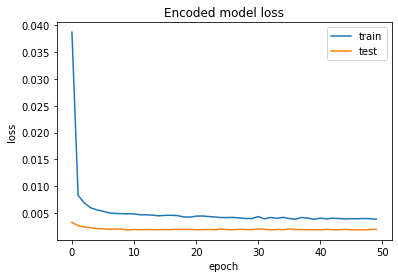

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994733330992591


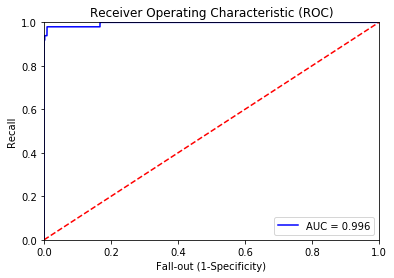

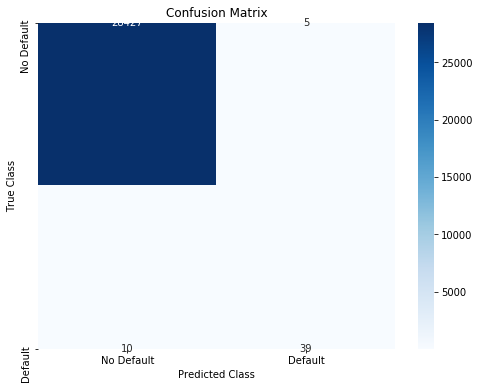

AUC(ROC): 0.8978712545794908
Precision: 0.8863636363636364
Recall: 0.7959183673469388
F1 score: 0.8387096774193548
False positives: 5
True positives: 39
False negatives: 10
True negatives: 28427
Fold #6
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 23s 91us/step - loss: 0.0016 - val_loss: 2.8027e-04
Epoch 2/150
256326/256326 [==============================] - 23s 88us/step - loss: 2.1141e-04 - val_loss: 1.8221e-04
Epoch 3/150
256326/256326 [==============================] - 22s 87us/step - loss: 1.4397e-04 - val_loss: 1.1683e-04
Epoch 4/150
256326/256326 [==============================] - 22s 86us/step - loss: 1.1718e-04 - val_loss: 1.0551e-04
Epoch 5/150
256326/256326 [==============================] - 22s 84us/step - loss: 1.0686e-04 - val_loss: 9.9298e-05
Epoch 6/150
256326/256326 [==============================] - 22s 85us/step - loss: 1.0093e-04 - val_loss: 9.6347e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 22s 88us/step - loss: 4.0849e-05 - val_loss: 3.7466e-05
Epoch 69/150
256326/256326 [==============================] - 22s 87us/step - loss: 4.0775e-05 - val_loss: 3.9714e-05
Epoch 70/150
256326/256326 [==============================] - 22s 87us/step - loss: 4.0226e-05 - val_loss: 4.0657e-05
Epoch 71/150
256326/256326 [==============================] - 22s 87us/step - loss: 4.0276e-05 - val_loss: 5.0005e-05
Epoch 72/150
256326/256326 [==============================] - 23s 88us/step - loss: 3.9710e-05 - val_loss: 4.5526e-05
Epoch 73/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.9545e-05 - val_loss: 4.0619e-05
Epoch 74/150
256326/256326 [==============================] - 22s 84us/step - loss: 3.9379e-05 - val_loss: 4.0323e-05
Epoch 75/150
256326/256326 [==============================] - 22s 85us/step - loss: 3.9393e-05 - val_loss: 4.3182e-05
Epoch 76/150
256326/256326 [==============================] - 22s 85u

256326/256326 [==============================] - 23s 91us/step - loss: 3.7369e-05 - val_loss: 3.9587e-05
Epoch 138/150
256326/256326 [==============================] - 23s 90us/step - loss: 3.6724e-05 - val_loss: 3.8818e-05
Epoch 139/150
256326/256326 [==============================] - 23s 92us/step - loss: 3.6732e-05 - val_loss: 3.5004e-05
Epoch 140/150
256326/256326 [==============================] - 23s 90us/step - loss: 3.6420e-05 - val_loss: 4.2574e-05
Epoch 141/150
256326/256326 [==============================] - 23s 91us/step - loss: 3.5763e-05 - val_loss: 3.5132e-05
Epoch 142/150
256326/256326 [==============================] - 23s 91us/step - loss: 3.5758e-05 - val_loss: 3.8123e-05
Epoch 143/150
256326/256326 [==============================] - 23s 92us/step - loss: 3.5501e-05 - val_loss: 3.4901e-05
Epoch 144/150
256326/256326 [==============================] - 23s 90us/step - loss: 3.8903e-05 - val_loss: 4.0604e-05
Epoch 145/150
256326/256326 [==============================] -

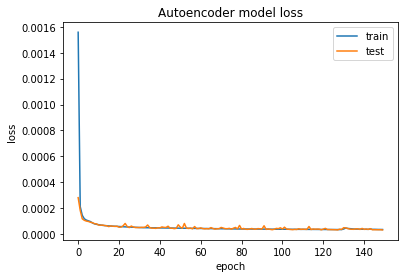

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 57s 223us/step - loss: 0.0364 - accuracy: 0.9895 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 2/50
256326/256326 [==============================] - 55s 215us/step - loss: 0.0087 - accuracy: 0.9986 - val_loss: 0.0024 - val_accuracy: 0.9994
Epoch 3/50
256326/256326 [==============================] - 54s 212us/step - loss: 0.0070 - accuracy: 0.9988 - val_loss: 0.0023 - val_accuracy: 0.9995
Epoch 4/50
256326/256326 [==============================] - 55s 214us/step - loss: 0.0065 - accuracy: 0.9989 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 5/50
256326/256326 [==============================] - 53s 207us/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.0022 - val_accuracy: 0.9997
Epoch 6/50
256326/256326 [==============================] - 52s 204us/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.0022 - val_accuracy: 0.9996
Epoch 7/50
256326/256326 [=================

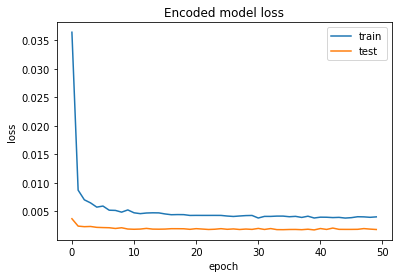

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9996839998595555


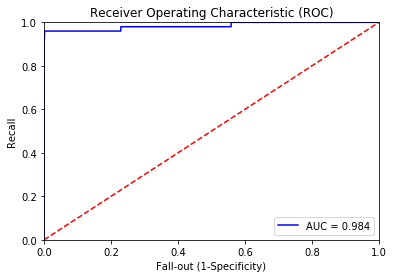

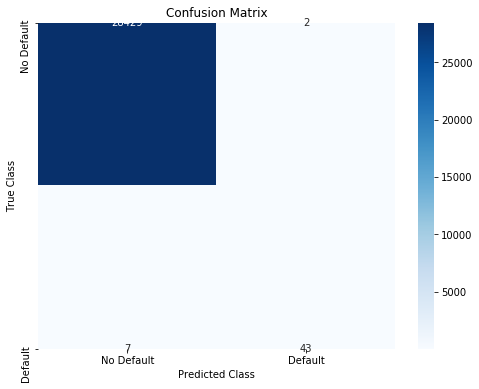

AUC(ROC): 0.9299648271253209
Precision: 0.9555555555555556
Recall: 0.86
F1 score: 0.9052631578947369
False positives: 2
True positives: 43
False negatives: 7
True negatives: 28429
Fold #7
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 23s 91us/step - loss: 0.0015 - val_loss: 2.9986e-04
Epoch 2/150
256326/256326 [==============================] - 23s 88us/step - loss: 2.0042e-04 - val_loss: 1.5903e-04
Epoch 3/150
256326/256326 [==============================] - 23s 88us/step - loss: 1.4226e-04 - val_loss: 1.2531e-04
Epoch 4/150
256326/256326 [==============================] - 22s 87us/step - loss: 1.1628e-04 - val_loss: 1.0368e-04
Epoch 5/150
256326/256326 [==============================] - 22s 87us/step - loss: 1.0261e-04 - val_loss: 9.6988e-05
Epoch 6/150
256326/256326 [==============================] - 23s 89us/step - loss: 9.2536e-05 - val_loss: 9.0421e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 22s 86us/step - loss: 3.7932e-05 - val_loss: 3.7257e-05
Epoch 69/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.7633e-05 - val_loss: 3.7680e-05
Epoch 70/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.7753e-05 - val_loss: 3.9082e-05
Epoch 71/150
256326/256326 [==============================] - 22s 87us/step - loss: 3.7713e-05 - val_loss: 5.3434e-05
Epoch 72/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.7508e-05 - val_loss: 5.2670e-05
Epoch 73/150
256326/256326 [==============================] - 22s 87us/step - loss: 3.9176e-05 - val_loss: 4.0523e-05
Epoch 74/150
256326/256326 [==============================] - 22s 87us/step - loss: 3.7041e-05 - val_loss: 3.7969e-05
Epoch 75/150
256326/256326 [==============================] - 22s 87us/step - loss: 3.6999e-05 - val_loss: 3.6002e-05
Epoch 76/150
256326/256326 [==============================] - 22s 86u

256326/256326 [==============================] - 23s 90us/step - loss: 3.1196e-05 - val_loss: 3.2443e-05
Epoch 138/150
256326/256326 [==============================] - 23s 89us/step - loss: 3.1305e-05 - val_loss: 3.4094e-05
Epoch 139/150
256326/256326 [==============================] - 23s 90us/step - loss: 3.1095e-05 - val_loss: 5.5778e-05
Epoch 140/150
256326/256326 [==============================] - 23s 89us/step - loss: 3.0828e-05 - val_loss: 2.9406e-05
Epoch 141/150
256326/256326 [==============================] - 23s 89us/step - loss: 3.0860e-05 - val_loss: 4.1784e-05
Epoch 142/150
256326/256326 [==============================] - 23s 88us/step - loss: 3.0930e-05 - val_loss: 3.1450e-05
Epoch 143/150
256326/256326 [==============================] - 23s 90us/step - loss: 3.1084e-05 - val_loss: 5.6867e-05
Epoch 144/150
256326/256326 [==============================] - 23s 89us/step - loss: 3.0834e-05 - val_loss: 3.5067e-05
Epoch 145/150
256326/256326 [==============================] -

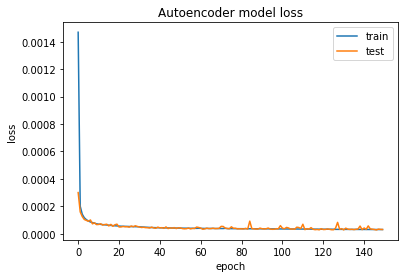

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 57s 222us/step - loss: 0.0300 - accuracy: 0.9915 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 2/50
256326/256326 [==============================] - 55s 214us/step - loss: 0.0066 - accuracy: 0.9988 - val_loss: 0.0047 - val_accuracy: 0.9994
Epoch 3/50
256326/256326 [==============================] - 54s 211us/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 4/50
256326/256326 [==============================] - 54s 210us/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0045 - val_accuracy: 0.9994
Epoch 5/50
256326/256326 [==============================] - 54s 211us/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 6/50
256326/256326 [==============================] - 54s 210us/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 7/50
256326/256326 [=================

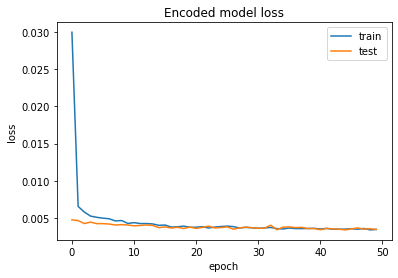

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993328885923949


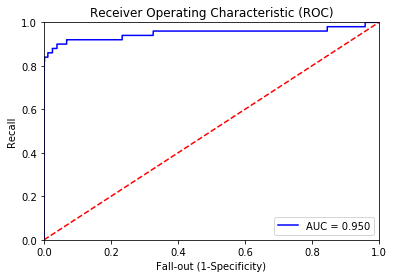

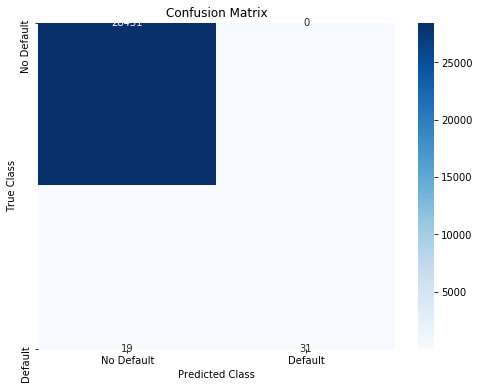

AUC(ROC): 0.81
Precision: 1.0
Recall: 0.62
F1 score: 0.7654320987654321
False positives: 0
True positives: 31
False negatives: 19
True negatives: 28431
Fold #8
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256327 samples, validate on 28480 samples
Epoch 1/150
256327/256327 [==============================] - 22s 87us/step - loss: 0.0017 - val_loss: 2.5297e-04
Epoch 2/150
256327/256327 [==============================] - 22s 86us/step - loss: 1.8610e-04 - val_loss: 1.3128e-04
Epoch 3/150
256327/256327 [==============================] - 22s 84us/step - loss: 1.2665e-04 - val_loss: 1.2461e-04
Epoch 4/150
256327/256327 [==============================] - 21s 83us/step - loss: 1.1864e-04 - val_loss: 1.0889e-04
Epoch 5/150
256327/256327 [==============================] - 21s 83us/step - loss: 1.0856e-04 - val_loss: 1.1089e-04
Epoch 6/150
256327/256327 [==============================] - 21s 83us/step - loss: 1.0025e-04 - val_loss: 9.2895e-05
Epoch 7/150
256327/256327 [===================

256327/256327 [==============================] - 22s 87us/step - loss: 4.0754e-05 - val_loss: 3.9794e-05
Epoch 69/150
256327/256327 [==============================] - 22s 85us/step - loss: 4.0548e-05 - val_loss: 5.0196e-05
Epoch 70/150
256327/256327 [==============================] - 22s 88us/step - loss: 4.0050e-05 - val_loss: 4.2866e-05
Epoch 71/150
256327/256327 [==============================] - 22s 85us/step - loss: 3.9587e-05 - val_loss: 4.8814e-05
Epoch 72/150
256327/256327 [==============================] - 22s 87us/step - loss: 3.9823e-05 - val_loss: 4.8367e-05
Epoch 73/150
256327/256327 [==============================] - 22s 86us/step - loss: 3.9849e-05 - val_loss: 4.7844e-05
Epoch 74/150
256327/256327 [==============================] - 23s 90us/step - loss: 3.9534e-05 - val_loss: 5.5094e-05
Epoch 75/150
256327/256327 [==============================] - 23s 88us/step - loss: 3.9353e-05 - val_loss: 3.7903e-05
Epoch 76/150
256327/256327 [==============================] - 23s 90u

256327/256327 [==============================] - 23s 89us/step - loss: 3.4467e-05 - val_loss: 3.6159e-05
Epoch 138/150
256327/256327 [==============================] - 22s 87us/step - loss: 3.4248e-05 - val_loss: 3.6303e-05
Epoch 139/150
256327/256327 [==============================] - 23s 89us/step - loss: 3.3787e-05 - val_loss: 3.1934e-05
Epoch 140/150
256327/256327 [==============================] - 22s 87us/step - loss: 3.3963e-05 - val_loss: 3.5369e-05
Epoch 141/150
256327/256327 [==============================] - 23s 89us/step - loss: 3.4232e-05 - val_loss: 4.3964e-05
Epoch 142/150
256327/256327 [==============================] - 22s 87us/step - loss: 3.3863e-05 - val_loss: 3.5915e-05
Epoch 143/150
256327/256327 [==============================] - 23s 90us/step - loss: 3.3783e-05 - val_loss: 4.0246e-05
Epoch 144/150
256327/256327 [==============================] - 22s 88us/step - loss: 3.3790e-05 - val_loss: 3.5653e-05
Epoch 145/150
256327/256327 [==============================] -

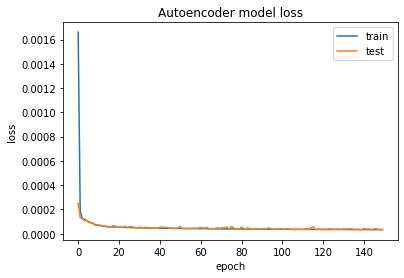

Train on 256327 samples, validate on 28480 samples
Epoch 1/50
256327/256327 [==============================] - 56s 219us/step - loss: 0.0382 - accuracy: 0.9882 - val_loss: 0.0052 - val_accuracy: 0.9992
Epoch 2/50
256327/256327 [==============================] - 53s 208us/step - loss: 0.0067 - accuracy: 0.9989 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 3/50
256327/256327 [==============================] - 53s 206us/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 4/50
256327/256327 [==============================] - 53s 208us/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 5/50
256327/256327 [==============================] - 52s 204us/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 6/50
256327/256327 [==============================] - 52s 203us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 7/50
256327/256327 [=================

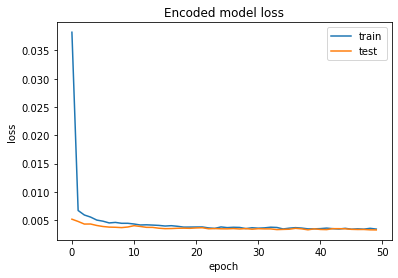

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.999438202247191


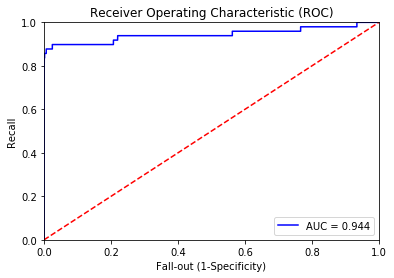

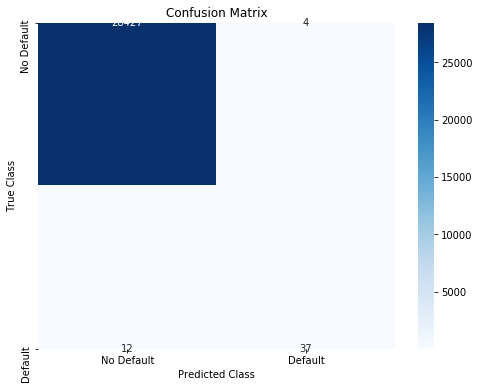

AUC(ROC): 0.8774806746588052
Precision: 0.9024390243902439
Recall: 0.7551020408163265
F1 score: 0.8222222222222222
False positives: 4
True positives: 37
False negatives: 12
True negatives: 28427
Fold #9
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256327 samples, validate on 28480 samples
Epoch 1/150
256327/256327 [==============================] - 23s 90us/step - loss: 0.0014 - val_loss: 2.7943e-04
Epoch 2/150
256327/256327 [==============================] - 22s 87us/step - loss: 1.9140e-04 - val_loss: 1.4310e-04
Epoch 3/150
256327/256327 [==============================] - 22s 87us/step - loss: 1.2754e-04 - val_loss: 1.2661e-04
Epoch 4/150
256327/256327 [==============================] - 22s 87us/step - loss: 1.2081e-04 - val_loss: 1.2167e-04
Epoch 5/150
256327/256327 [==============================] - 22s 86us/step - loss: 1.1258e-04 - val_loss: 1.0934e-04
Epoch 6/150
256327/256327 [==============================] - 22s 86us/step - loss: 1.0283e-04 - val_loss: 1.0436e-04
Epoch 7/150
256327/256327 [===================

256327/256327 [==============================] - 22s 88us/step - loss: 3.7855e-05 - val_loss: 3.8338e-05
Epoch 69/150
256327/256327 [==============================] - 23s 89us/step - loss: 3.7709e-05 - val_loss: 3.8280e-05
Epoch 70/150
256327/256327 [==============================] - 22s 87us/step - loss: 3.7652e-05 - val_loss: 3.4407e-05
Epoch 71/150
256327/256327 [==============================] - 23s 90us/step - loss: 3.7458e-05 - val_loss: 4.1018e-05
Epoch 72/150
256327/256327 [==============================] - 22s 88us/step - loss: 3.7420e-05 - val_loss: 3.7804e-05
Epoch 73/150
256327/256327 [==============================] - 23s 88us/step - loss: 3.7332e-05 - val_loss: 3.5531e-05
Epoch 74/150
256327/256327 [==============================] - 22s 86us/step - loss: 3.6985e-05 - val_loss: 3.4038e-05
Epoch 75/150
256327/256327 [==============================] - 23s 89us/step - loss: 3.7147e-05 - val_loss: 9.0510e-05
Epoch 76/150
256327/256327 [==============================] - 22s 86u

256327/256327 [==============================] - 22s 86us/step - loss: 3.2792e-05 - val_loss: 3.2055e-05
Epoch 138/150
256327/256327 [==============================] - 23s 89us/step - loss: 3.2680e-05 - val_loss: 3.7199e-05
Epoch 139/150
256327/256327 [==============================] - 22s 87us/step - loss: 3.2607e-05 - val_loss: 3.2487e-05
Epoch 140/150
256327/256327 [==============================] - 23s 90us/step - loss: 3.2868e-05 - val_loss: 3.4454e-05
Epoch 141/150
256327/256327 [==============================] - 23s 89us/step - loss: 3.2560e-05 - val_loss: 3.2122e-05
Epoch 142/150
256327/256327 [==============================] - 23s 89us/step - loss: 3.2560e-05 - val_loss: 3.9524e-05
Epoch 143/150
256327/256327 [==============================] - 21s 83us/step - loss: 3.2218e-05 - val_loss: 3.3172e-05
Epoch 144/150
256327/256327 [==============================] - 21s 81us/step - loss: 3.2423e-05 - val_loss: 2.9989e-05
Epoch 145/150
256327/256327 [==============================] -

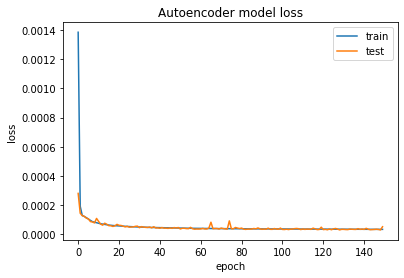

Train on 256327 samples, validate on 28480 samples
Epoch 1/50
256327/256327 [==============================] - 49s 191us/step - loss: 0.0202 - accuracy: 0.9952 - val_loss: 0.0045 - val_accuracy: 0.9992
Epoch 2/50
256327/256327 [==============================] - 48s 187us/step - loss: 0.0066 - accuracy: 0.9988 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 3/50
256327/256327 [==============================] - 48s 186us/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 4/50
256327/256327 [==============================] - 48s 186us/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 5/50
256327/256327 [==============================] - 48s 186us/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 6/50
256327/256327 [==============================] - 47s 185us/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 7/50
256327/256327 [=================

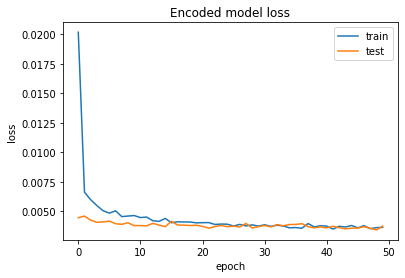

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9992977528089888


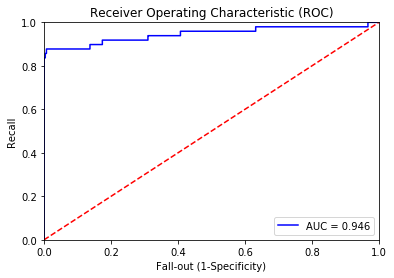

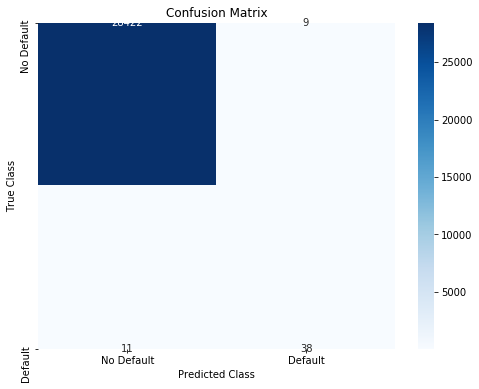

AUC(ROC): 0.8875968241047606
Precision: 0.8085106382978723
Recall: 0.7755102040816326
F1 score: 0.7916666666666665
False positives: 9
True positives: 38
False negatives: 11
True negatives: 28422
Fold #10
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256327 samples, validate on 28480 samples
Epoch 1/150
256327/256327 [==============================] - 23s 90us/step - loss: 0.0014 - val_loss: 2.5139e-04
Epoch 2/150
256327/256327 [==============================] - 23s 89us/step - loss: 1.8023e-04 - val_loss: 1.3726e-04
Epoch 3/150
256327/256327 [==============================] - 22s 86us/step - loss: 1.2839e-04 - val_loss: 1.2233e-04
Epoch 4/150
256327/256327 [==============================] - 22s 87us/step - loss: 1.2031e-04 - val_loss: 1.1726e-04
Epoch 5/150
256327/256327 [==============================] - 22s 87us/step - loss: 1.1150e-04 - val_loss: 1.1551e-04
Epoch 6/150
256327/256327 [==============================] - 22s 86us/step - loss: 1.0125e-04 - val_loss: 1.0015e-04
Epoch 7/150
256327/256327 [===================

256327/256327 [==============================] - 22s 87us/step - loss: 4.0054e-05 - val_loss: 4.0606e-05
Epoch 69/150
256327/256327 [==============================] - 22s 87us/step - loss: 4.0379e-05 - val_loss: 4.1365e-05
Epoch 70/150
256327/256327 [==============================] - 22s 87us/step - loss: 4.0014e-05 - val_loss: 4.2545e-05
Epoch 71/150
256327/256327 [==============================] - 22s 87us/step - loss: 4.0012e-05 - val_loss: 4.1618e-05
Epoch 72/150
256327/256327 [==============================] - 22s 87us/step - loss: 3.9928e-05 - val_loss: 4.2345e-05
Epoch 73/150
256327/256327 [==============================] - 22s 87us/step - loss: 3.9773e-05 - val_loss: 4.3183e-05
Epoch 74/150
256327/256327 [==============================] - 22s 86us/step - loss: 3.9389e-05 - val_loss: 4.6708e-05
Epoch 75/150
256327/256327 [==============================] - 22s 86us/step - loss: 3.9318e-05 - val_loss: 4.0955e-05
Epoch 76/150
256327/256327 [==============================] - 22s 86u

256327/256327 [==============================] - 23s 89us/step - loss: 3.4257e-05 - val_loss: 3.5137e-05
Epoch 138/150
256327/256327 [==============================] - 23s 89us/step - loss: 3.4447e-05 - val_loss: 3.3396e-05
Epoch 139/150
256327/256327 [==============================] - 23s 89us/step - loss: 3.4081e-05 - val_loss: 5.4635e-05
Epoch 140/150
256327/256327 [==============================] - 23s 89us/step - loss: 3.4066e-05 - val_loss: 3.1624e-05
Epoch 141/150
256327/256327 [==============================] - 23s 89us/step - loss: 3.4010e-05 - val_loss: 3.4605e-05
Epoch 142/150
256327/256327 [==============================] - 23s 89us/step - loss: 3.4165e-05 - val_loss: 3.2308e-05
Epoch 143/150
256327/256327 [==============================] - 23s 89us/step - loss: 3.3968e-05 - val_loss: 3.2443e-05
Epoch 144/150
256327/256327 [==============================] - 23s 90us/step - loss: 3.3760e-05 - val_loss: 3.7986e-05
Epoch 145/150
256327/256327 [==============================] -

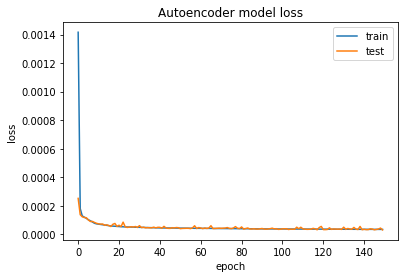

Train on 256327 samples, validate on 28480 samples
Epoch 1/50
256327/256327 [==============================] - 56s 218us/step - loss: 0.0258 - accuracy: 0.9936 - val_loss: 0.0057 - val_accuracy: 0.9989
Epoch 2/50
256327/256327 [==============================] - 55s 213us/step - loss: 0.0082 - accuracy: 0.9986 - val_loss: 0.0049 - val_accuracy: 0.9990
Epoch 3/50
256327/256327 [==============================] - 54s 212us/step - loss: 0.0070 - accuracy: 0.9988 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 4/50
256327/256327 [==============================] - 55s 214us/step - loss: 0.0061 - accuracy: 0.9990 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 5/50
256327/256327 [==============================] - 55s 214us/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 6/50
256327/256327 [==============================] - 55s 215us/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 7/50
256327/256327 [=================

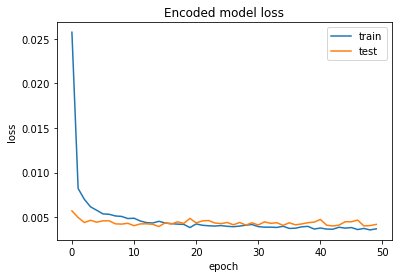

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9992626404494382


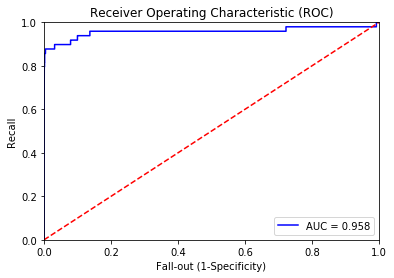

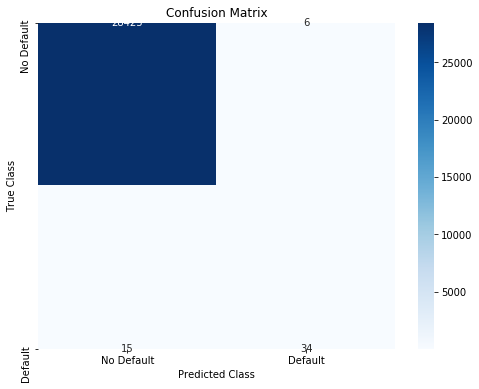

AUC(ROC): 0.846833256886167
Precision: 0.85
Recall: 0.6938775510204082
F1 score: 0.7640449438202247
False positives: 6
True positives: 34
False negatives: 15
True negatives: 28425


In [6]:
nb_epoch = 20
#batch_size = 256
input_dim = X.shape[1] #num of columns, 30
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
hidden_dim = 15
learning_rate = 1e-7


#Cross_Validate

kf = StratifiedKFold(10, shuffle = True, random_state=42) # Use for Kfold Validation


tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = BorderlineSMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim_1, activation="elu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim_2, activation = "elu")(encoder)
    encoder = Dense(encoding_dim_3, activation = "elu")(encoder)

    encoder = Dense(hidden_dim, activation="elu")(encoder)

    decoder = Dense(encoding_dim_3, activation = "elu")(encoder)
    decoder = Dense(encoding_dim_2, activation = "elu")(decoder)
    decoder = Dense(encoding_dim_1, activation = "elu")(decoder)
    decoder = Dense(input_dim, activation="elu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',loss='mean_squared_error')
    #Fit to train set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(x_train, x_train,epochs=150,shuffle=True,validation_data=(x_test, x_test))
    
    
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, encoder)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape

    epochs = 50
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train,epochs=epochs,validation_data=(encoded_test_x, y_test), verbose=1)
    
    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    
    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)



In [7]:
print(" Average tn = " + str(Average(tn_summary)))
print(" Average fp = " + str(Average(fp_summary)))
print(" Average fn = "+ str(Average(fn_summary)))    
print(" Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print(" Average Precision = " + str(Average_precision))

print(" Average Recall = " + str(Average_recall))

print(" Average F1 score = " + str(Average_f1_score))

 Average tn = 28426.3
 Average fp = 5.2
 Average fn = 12.0
 Average tp = 37.2
 Average Precision = 0.8773584905660377
 Average Recall = 0.7560975609756098
 Average F1 score = 0.8122270742358079


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print(" Total fp: " + str(total_fp))
print(" Total fn: " + str(total_fn))
print(" Total tp: " + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print(" Total Precision = " + str(Total_Precision))
print(" Total Recall = " + str(Total_Recall))
print(" Total F1_score = " + str(Total_F1_score))

 Total tn: 284263
 Total fp: 52
 Total fn: 120
 Total tp: 372
 Total Precision = 0.8773584905660378
 Total Recall = 0.7560975609756098
 Total F1_score = 0.8122270742358079


In [9]:

print("--- %s seconds ---" % (time.time() - start_time))

Total_time = (time.time()-start_time)

print(Total_time)

--- 58424.03297019005 seconds ---
58424.03797125816


In [10]:
Total_time_hours = Total_time/3600

print(Total_time_hours)

16.2288994364606
